In [11]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 594.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 24.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 20.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 26.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.3 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


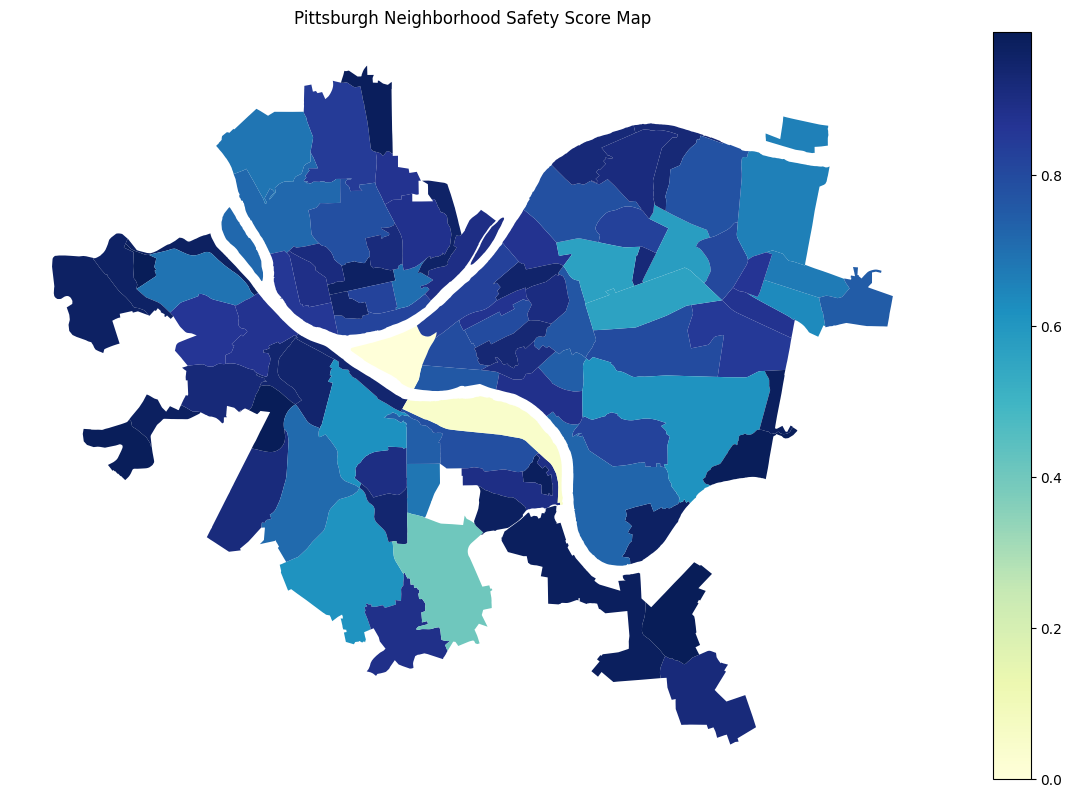

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

crime_df = pd.read_csv("data/crime.csv")
crime_df = crime_df[crime_df['INCIDENTNEIGHBORHOOD'].notna()]
crime_counts = crime_df['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
crime_counts.columns = ['neighborhood', 'crime_count']

crime_counts['score'] = 1 - (
    (crime_counts['crime_count'] - crime_counts['crime_count'].min()) /
    (crime_counts['crime_count'].max() - crime_counts['crime_count'].min())
)

crime_counts.to_csv("data/crime_scores.csv", index=False)

gdf = gpd.read_file("data/Neighborhoods_.shp")

merged = gdf.merge(crime_counts, left_on="hood", right_on="neighborhood")

merged.plot(column="score", cmap="YlGnBu", legend=True, figsize=(12, 8))

plt.title("Pittsburgh Neighborhood Safety Score Map")
plt.axis("off")
plt.tight_layout()
plt.savefig("figures/crime_score_map.png")
plt.show()